In [1]:
import nd2
import sys
import numpy as np
import cv2 as cv
from skimage import io
from scipy import ndimage
def read_nd2_confocal(path):
    return np.max(nd2.imread(path), axis=0).astype(np.uint16)

def shuffle_labels_notcontinuous(labels):
    random_label_dict = np.unique(labels)
    random_label_dict = random_label_dict[random_label_dict!=0]
    random_label_dict = dict(zip(random_label_dict, np.random.permutation(np.arange(1,len(random_label_dict)+1))))
    random_labels = np.zeros_like(labels)
    for i in random_label_dict:
        random_labels[labels==i] = random_label_dict[i]
    return random_labels

In [2]:
def normalize(img, pmin=1, pmax=99.9):
    min_ = np.percentile(img, pmin)
    max_ = np.percentile(img, pmax)
    return (np.clip((img - min_)/(max_ - min_), 0, 1)*255).astype(np.uint8)

In [3]:
file_name = "../batch 4 of model 2 data/01.08.2022 large image 533rH2X, 647aSMA, 488 actin, DAPI/old load/old load 533rH2X, 647aSMA, 488actin002/3.nd2"

img = read_nd2_confocal(file_name)

In [4]:
img.shape

(5, 3052, 3052)

In [5]:
img_cyto = normalize(img[1])
img_nuc = normalize(img[0])

In [6]:
im = np.stack((img_cyto,img_cyto,img_cyto,img_nuc), axis=-1)

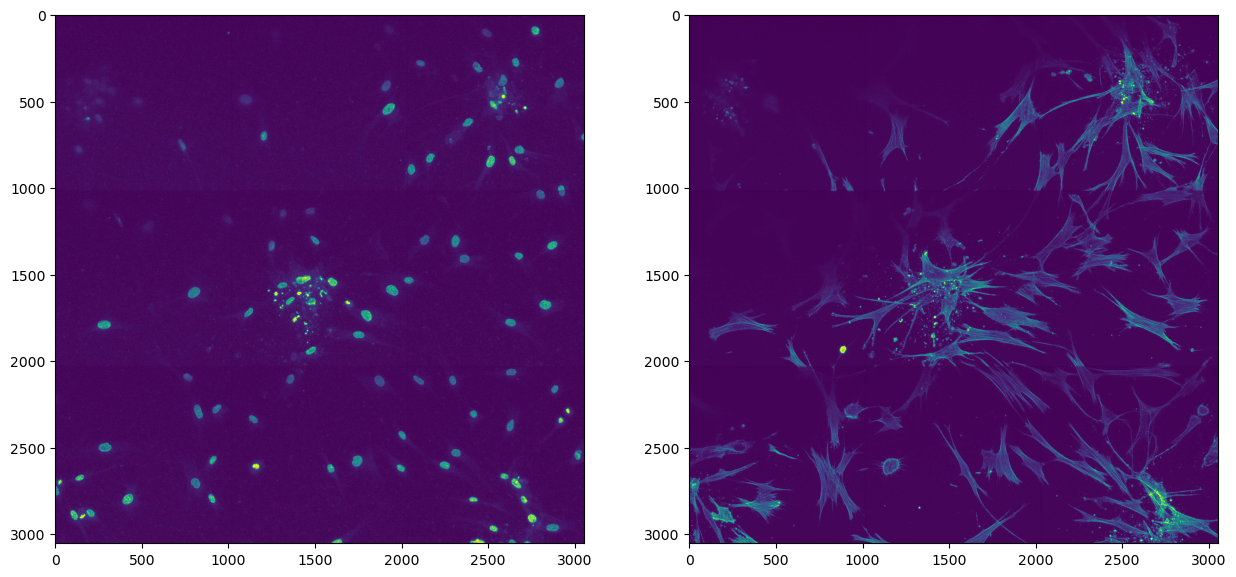

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.flatten()
axes[0].imshow(im[:,:,3])
axes[1].imshow(im[:,:,2])

In [8]:
from cellpose import models
# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(model_type='cyto')

In [9]:
# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[2,3]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

#channels = [[1,0]]

In [13]:
masks, flows, styles, diams = model.eval(im, diameter=100, channels=channels)

In [12]:
diams

100

In [18]:
masks.shape

(3052, 3052)

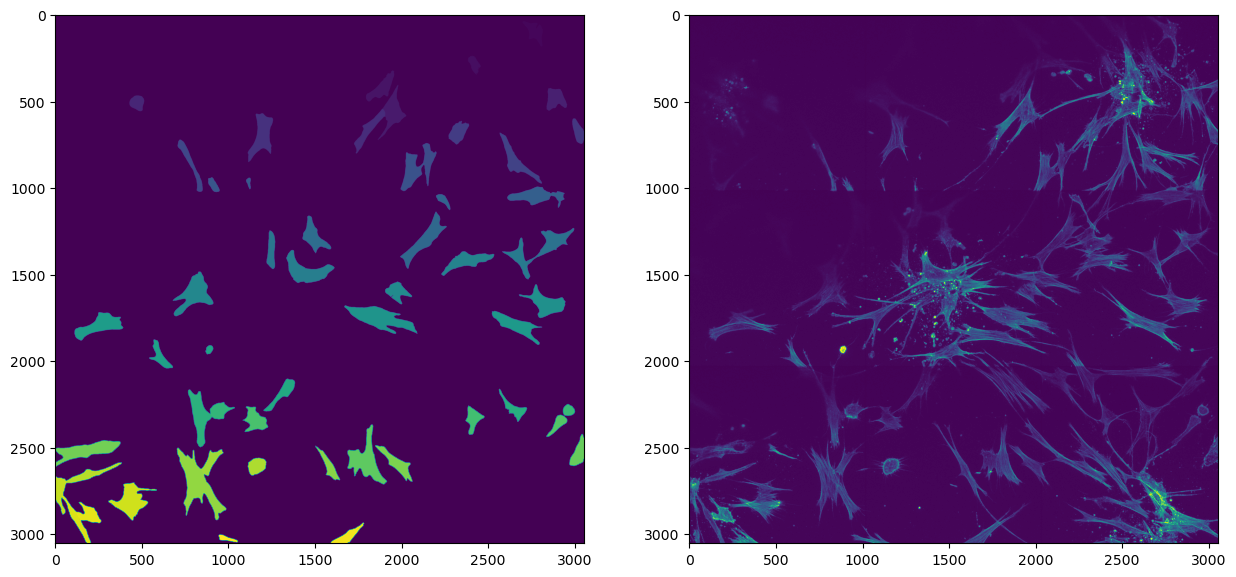

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.flatten()
axes[0].imshow(masks)
axes[1].imshow(im[:,:,2])

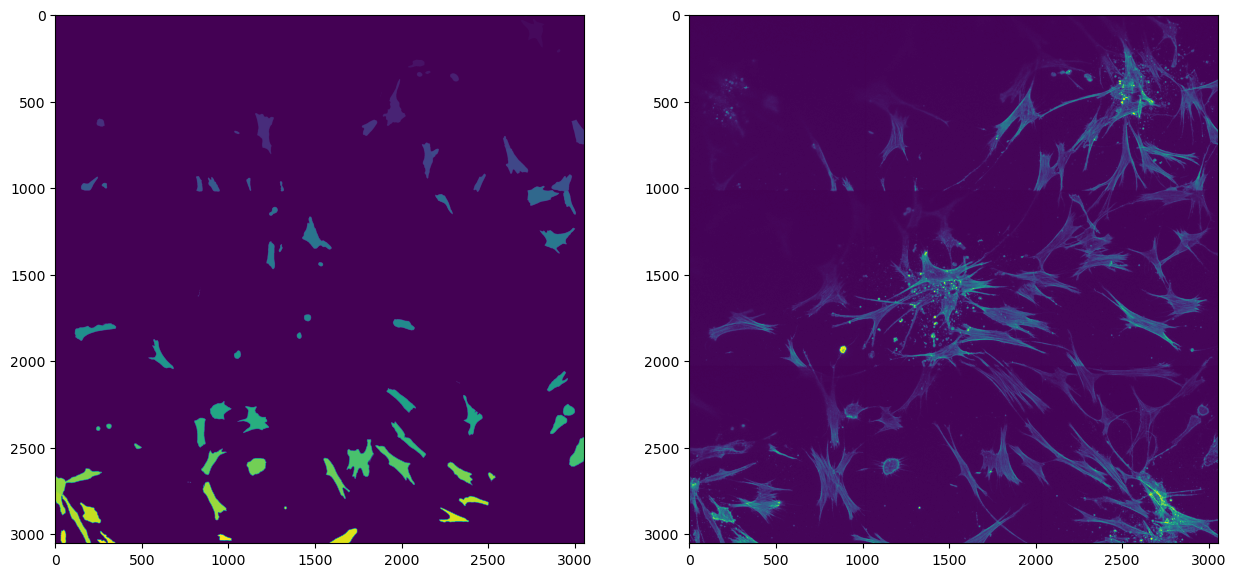

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.flatten()
axes[0].imshow(masks)
axes[1].imshow(im[:,:,2])